In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import tree,datasets
from sklearn.model_selection import train_test_split
wine = datasets.load_wine()
X = wine.data[:,:2]
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [2]:
clf = tree.DecisionTreeClassifier(max_depth=1)
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

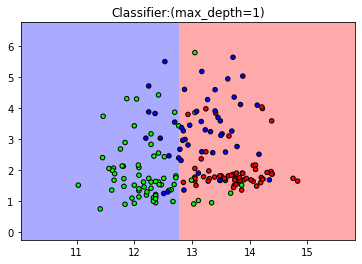

In [3]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#0000FF'])
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolors='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:(max_depth=1)")
plt.show()

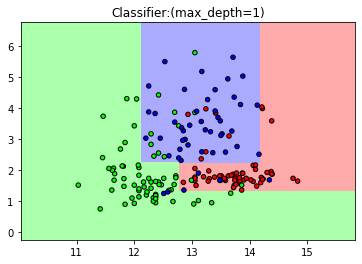

In [4]:
clf2 = tree.DecisionTreeClassifier(max_depth=3)
clf2.fit(X_train,y_train)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#0000FF'])
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))
Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolors='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:(max_depth=3)")
plt.show()

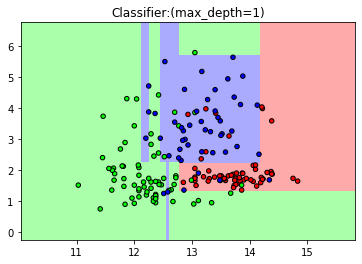

In [5]:
clf3 = tree.DecisionTreeClassifier(max_depth=5)
clf3.fit(X_train,y_train)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#0000FF'])
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))
Z = clf3.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolors='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:(max_depth=5)")
plt.show()

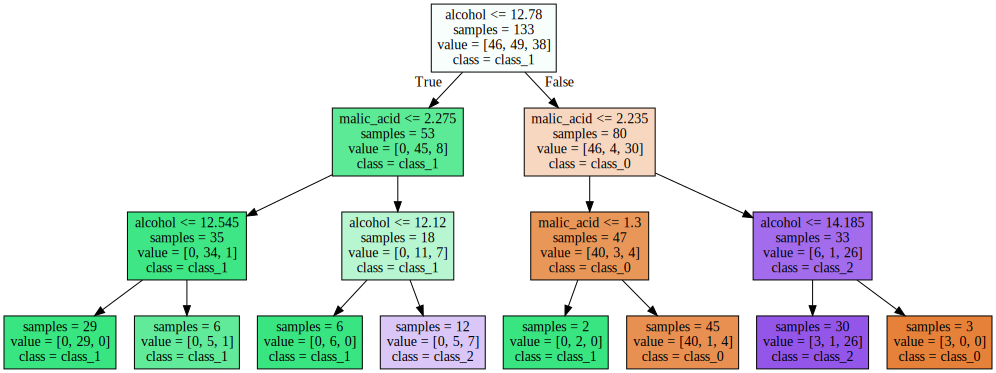

In [6]:
import graphviz
from sklearn.tree import export_graphviz
export_graphviz(clf2, out_file="wine.dot", class_names=wine.target_names,
feature_names=wine.feature_names[:2], impurity=False, filled=True)
with open("wine.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## 6.2 随机森林

In [17]:
from sklearn.ensemble import RandomForestClassifier
wine = datasets.load_wine()
X = wine.data[:,:2]
y = wine.target
X_train, X_test, y_train, y_train
forest = RandomForestClassifier(n_estimators=6,random_state=3)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=6,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

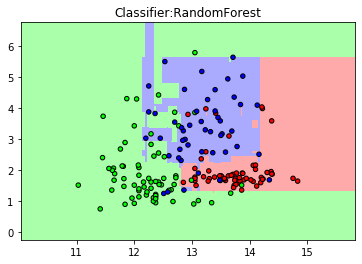

In [18]:
#定义图像中分区的颜色和散点的颜色
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#分别用样本的两个特征值创建图像和横轴和纵轴
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))
Z = forest.predict(np.c_[xx.ravel(), yy.ravel()])

#给每个分类中的样本分配不同的颜色
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

#用散点把样本表示出来
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:RandomForest")

plt.show()

In [19]:
import pandas as pd
data = pd.read_csv('adult.csv', header=None, index_col=False,
                  names=['年龄','单位性质','权重','学历','受教育时长',
                        '婚姻状况','职业','家庭情况','种族','性别',
                        '资产所得','资产损失','周工作时长','原籍',
                        '收入'])
#为了方便展示，我们选取其中一部分数据
data_lite = data[['年龄','单位性质','学历','性别','周工作时长',
                 '职业','收入']]
#下面看一下数据的前5行是不是我们想要的结果
display(data_lite.head())

,年龄,单位性质,学历,性别,周工作时长,职业,收入
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [21]:
data_dummies = pd.get_dummies(data_lite)
print('样本原始特征：\n',list(data_lite.columns),'\n')
print('虚拟变量特征：\n',list(data_dummies.columns))

样本原始特征：
 ['年龄', '单位性质', '学历', '性别', '周工作时长', '职业', '收入'] 

虚拟变量特征：
 ['年龄', '周工作时长', '单位性质_ ?', '单位性质_ Federal-gov', '单位性质_ Local-gov', '单位性质_ Never-worked', '单位性质_ Private', '单位性质_ Self-emp-inc', '单位性质_ Self-emp-not-inc', '单位性质_ State-gov', '单位性质_ Without-pay', '学历_ 10th', '学历_ 11th', '学历_ 12th', '学历_ 1st-4th', '学历_ 5th-6th', '学历_ 7th-8th', '学历_ 9th', '学历_ Assoc-acdm', '学历_ Assoc-voc', '学历_ Bachelors', '学历_ Doctorate', '学历_ HS-grad', '学历_ Masters', '学历_ Preschool', '学历_ Prof-school', '学历_ Some-college', '性别_ Female', '性别_ Male', '职业_ ?', '职业_ Adm-clerical', '职业_ Armed-Forces', '职业_ Craft-repair', '职业_ Exec-managerial', '职业_ Farming-fishing', '职业_ Handlers-cleaners', '职业_ Machine-op-inspct', '职业_ Other-service', '职业_ Priv-house-serv', '职业_ Prof-specialty', '职业_ Protective-serv', '职业_ Sales', '职业_ Tech-support', '职业_ Transport-moving', '收入_ <=50K', '收入_ >50K']


In [22]:
data_dummies.head()

,年龄,周工作时长,单位性质_ ?,单位性质_ Federal-gov,单位性质_ Local-gov,单位性质_ Never-worked,单位性质_ Private,单位性质_ Self-emp-inc,单位性质_ Self-emp-not-inc,单位性质_ State-gov,...,职业_ Machine-op-inspct,职业_ Other-service,职业_ Priv-house-serv,职业_ Prof-specialty,职业_ Protective-serv,职业_ Sales,职业_ Tech-support,职业_ Transport-moving,收入_ <=50K,收入_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [25]:
features = data_dummies.loc[:,'年龄':'职业_ Transport-moving']
X = features.values
y = data_dummies['收入_ >50K'].values
print('\n\n\n代码运行结果：')
print('==============')
print('特征形态：{} 标签形态：{}'.format(X.shape, y.shape))
print('==============')
print('\n\n\n')




代码运行结果：
特征形态：(32561, 44) 标签形态：(32561,)






In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
go_dating_tree = tree.DecisionTreeClassifier(max_depth=5)
go_dating_tree.fit(X_train, y_train)
print('\n\n\n代码运行结果：')
print('==============')
print('模型得分：{:2f}'.format(go_dating_tree.score(X_test,y_test)))
print('==============')
print('\n\n\n')




代码运行结果：
模型得分：0.796217




